# Q2 Data Science Homework

## Prompt:

Many questions within the commercial lending space take the form “What is X for a bank like us?” For example:

▪ “What is the average loan-to-value ratio on a typical owner-occupied real estate loan, for banks like us?”

▪ “What is the average rate on a typical 5-year term, owner-occupied real estate loan, for banks like us?”

To answer these questions, we need to be able to identify a group of banks that are “like” a given
bank. We use a combination of our own data and publicly available data (such FDIC data found
here: https://cdr.ffiec.gov/public/PWS/DownloadBulkData.aspx). We would like to see your solution to this problem. We would like you to solve the “banks like this one” problem.

# Question #1:

## Where would you start? What information do you wish you had? In the absence of perfect knowledge and access to perfect data, what can you do to make a first attempt?


## Answer: 

1) The first thing I am going to do is look over the complete data set, read the documentation (found [here](https://cdr.ffiec.gov/CDRDownload/CDR/UserGuide/v104/Technical%20Information.pdf)), and choose the appropriate sub-data set to work with.


2) The ideal data set would have as much clean data from each bank as possible. This would include features such as the number of customers and employees, the balance sheet, the income statements, individual account behaviors, location, liquidity, assets, ext. We can always remove features as it becomes neccesary.


3) After looking at the available data (and given the exploratory nature of this exercise), I chose to use the Executive Summary Data set within the UPBR Ratios dataset. I chose this dataset because:


    1. It contains a snapshot of the current state each bank; it is composed of processed data showing the relevant ratios and percentages obtained from the Call Reports. This is nice, as it already provides us with engineered features that we care about. 

    2. If we find something interesting, we can always go back and analyze the source data. This way we can avoid analyzing the whole data set and focus our time on what we care about. 

    3. It contains financial data for the current quarter, previous quarter, year-to-date information, and year ago quarter. This gives us an additional time component that the other data sets did not have.
    
## Main Plan: 

Use a yet-to-be-decided clustering algorithm to group banks into "like" groups. We don't want to predict data that we already have (the pre-labeled groups in the "UBPR Ranks" data set), we want new ones where we can extract non-trivial insights.


# Data Exploration, Cleaning, and Manipulation

The first thing I am going to do is familiarize myself with the data set, play around with the features, and look their distributions. 

Note that I chose to only work with data from 2021. The executive summary also has temporal data, so in reality we have data from the past 1.5 years. I chose this time period because I wanted to see the status of banks during the pandemic (performance might have changed significantly in 2020 compared to 2019). 

## Importing the data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn 

#importing the data
file_name = 'FFIEC CDR Bulk All UBPR Ratios 2021/FFIEC CDR UBPR Ratios Executive Summary Report 2021.csv'
data = pd.read_csv(file_name, header =1)

print("The shape of the original data is: " + str(data.shape))

The shape of the original data is: (10026, 54)


## Grouping Data from the Same Bank Into a Single Row

We will now average together rows with the same ID RSSD and different year quarters for now. 
This reduces our time resolution, but should be an OK approximation for now.

In [21]:
data = data.groupby("ID RSSD").mean()
print("The shape of the averaged data is: " + str(data.shape))
data.head()

The shape of the averaged data is: (5030, 32)


,TOTAL ASSETS,SURVEILLANCE MODEL ASSET GROWTH RATE,TOTAL DIVIDENDS AS PERCENT OF NET IN,ANNUAL CHANGE IN TIER 1 CAPITAL,NONCURRENT ASSETS AS PERCENT OF TOTL,RBC_T1_TOT_AA,RBC_TOT_RWA,LN_CNSTRC_CYA_TC,CRE_NONOWN_TC,CRE_TOT_TC,...,LIAB_SHRT_TRM_TA,LNLS_DEP_TOT,NI_ECAP_CYA,LNLS_PROV_1Q_AA,DIV_CASH_NET_INC,RE_TOT_CYA_TC,QTR NET INTEREST INCOME AS PERCENT O,QTR NET INTEREST INCOME AS PERCENT O.1,TIER ONE CAPITAL 3-MONTH GROWTH RAT,Labels
ID RSSD,,,,,,,,,,,,,,,,,,,,,
37,87889.0,11.750,36.585,1.305,0.57,18.37995,16.23290,1.44,5.220,9.23,...,-3.075,29.370,1.580,0.000,55.045,66.720,2.665,2.790,0.135,3
242,53622.5,18.755,154.930,0.905,0.07,9.58320,16.23290,0.00,59.500,59.50,...,-23.965,56.360,11.240,0.000,122.600,337.105,2.575,2.755,-0.845,3
279,333248.5,19.855,57.870,0.455,0.50,9.72080,16.23290,66.96,116.645,155.16,...,-6.155,80.105,2.915,0.015,132.980,636.850,2.605,2.750,0.005,3
354,18030.0,20.740,0.000,11.575,0.00,8.82200,16.23290,0.00,0.000,2.58,...,-44.240,52.150,4.410,0.000,0.000,166.970,3.345,3.445,2.240,3
457,63913.0,12.330,67.655,10.605,0.54,7.96065,13.17105,49.76,75.175,120.19,...,-30.360,92.875,15.185,0.000,73.995,500.705,3.450,3.550,0.980,3


## Looking at Highly-Correlated Features

We want to remove these features because they will give additional weight to the same underlying process during clustering if we keep them. 

Note that we will remove all correlated features but one. This is a rough cut, as correlation to one feature might not mean correlation to all other correlated features.

In [3]:
#Using Pearson Correlation
cor = data.corr().abs()

#only choosing upper traingular matrix
cor = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))

#looking which features are highly correlated (>0.95)
corr_feat = [col for col in cor.columns if any(cor[col] > 0.95)]

print("The highly correlated features are:\n")
print(corr_feat)
print("")

data.drop(corr_feat,axis=1,inplace=True)
print("")
print("The shape of the averaged uncorrelated data set is: " + str(data.shape))

#Ploting
#plt.figure(figsize=(len(corr_feat),len(corr_feat)))
#seaborn.heatmap(cor[corr_feat], annot=True, cmap=plt.cm.Reds)
#plt.show()

The highly correlated features are:

['TOTAL DEPOSITS', 'NET INCOME', 'INC_NET_1Q', 'INC_NONINT_1Q', 'LNLS_PROV_1Q', 'OVHD_EXP_1Q', 'LIAB_DBT_TOT', 'OVHD_EXP_TOT', 'LNLS_NET', 'INV_TOT', 'INC_NONINT_1Q_AA', 'OVHD_EXP_1Q_AA', 'INC_NET_1Q_AA', 'LNLS_LOSS_NET_A', 'TOT EQT CAP INC NONCTRL MINORITY INT', 'QTR NET INTEREST INCOME', 'NET INTEREST INCOME AS PERCENT OF AV', 'NET INTEREST INCOME AS PERCENT OF AV.1', 'ANNUALIZED QUARTERLY NET INCOME PERC', 'COM EQTY TIER1 CAP RATIO ADV APPRCH']


The shape of the averaged uncorrelated data set is: (5030, 32)


## Dealing with Missing Values

It also looks like some banks are missing some feature values.
We will input the median column values for these features. This is because:
1. The median is not affected by outliers.
2. We still want to keep some information from the remaining features. 
3. Having many samples with the same value should not affect distance-based clustering too much.

This is obviously a big (and debatable) rough cut, but I believe that the use of several uncorrelated dimensions will outweigh the damage of inputting missing values. The alternative is to drop these features.

In [4]:
#inputting the median
data.fillna(data.median(),inplace=True)
print("The shape of the clean averaged data is: " + str(data.shape))

#dropping column with so low variance that it makes no sense to include:
data.drop("LNLS_NET_GQ",axis=1,inplace=True)

data.head()

The shape of the clean averaged data is: (5030, 32)


,TOTAL ASSETS,SURVEILLANCE MODEL ASSET GROWTH RATE,TOTAL DIVIDENDS AS PERCENT OF NET IN,ANNUAL CHANGE IN TIER 1 CAPITAL,NONCURRENT ASSETS AS PERCENT OF TOTL,RBC_T1_TOT_AA,RBC_TOT_RWA,LN_CNSTRC_CYA_TC,CRE_NONOWN_TC,CRE_TOT_TC,...,RPRC_NET_1YR_A,LIAB_SHRT_TRM_TA,LNLS_DEP_TOT,NI_ECAP_CYA,LNLS_PROV_1Q_AA,DIV_CASH_NET_INC,RE_TOT_CYA_TC,QTR NET INTEREST INCOME AS PERCENT O,QTR NET INTEREST INCOME AS PERCENT O.1,TIER ONE CAPITAL 3-MONTH GROWTH RAT
ID RSSD,,,,,,,,,,,,,,,,,,,,,
37,87889.0,11.750,36.585,1.305,0.57,18.37995,16.23290,1.44,5.220,9.23,...,67.145,-3.075,29.370,1.580,0.000,55.045,66.720,2.665,2.790,0.135
242,53622.5,18.755,154.930,0.905,0.07,9.58320,16.23290,0.00,59.500,59.50,...,40.375,-23.965,56.360,11.240,0.000,122.600,337.105,2.575,2.755,-0.845
279,333248.5,19.855,57.870,0.455,0.50,9.72080,16.23290,66.96,116.645,155.16,...,54.835,-6.155,80.105,2.915,0.015,132.980,636.850,2.605,2.750,0.005
354,18030.0,20.740,0.000,11.575,0.00,8.82200,16.23290,0.00,0.000,2.58,...,37.890,-44.240,52.150,4.410,0.000,0.000,166.970,3.345,3.445,2.240
457,63913.0,12.330,67.655,10.605,0.54,7.96065,13.17105,49.76,75.175,120.19,...,35.505,-30.360,92.875,15.185,0.000,73.995,500.705,3.450,3.550,0.980


## Looking at the Distribution of Feature Values


In [5]:
#creating function to print distributions
def plot_distributions(input_data,col_num,width,height,title):
    
    #defining subplot
    plot_features = list(input_data.columns)
    fig = make_subplots(rows=(len(plot_features)//col_num)+1,
                        cols=col_num,
                        subplot_titles=(plot_features),
                       )

    
    #looping over features
    for row in range(len(plot_features)//col_num+1):
        for col in range(col_num):
            
            #breaking out of code if we plotted everything
            if (row*col_num)+col > len(plot_features)-1:
                break

            #plotting histgrams
            fig.add_trace(go.Histogram(x=input_data[plot_features[(row*col_num)+col]],
                                   #histnorm='probability',
                                   name = plot_features[(row*col_num)+col],
                                  ),
                     row=row+1, col=col+1)
    
    #printing plots
    fig.update_layout(height=height,
                      width=width,
                      title_text=title,
                      font=dict(size=10),
                      showlegend=False)
    
    #changing title sizes
    fig.update_annotations(font_size=10)
    
    #showing figure
    fig.show(renderer="png")

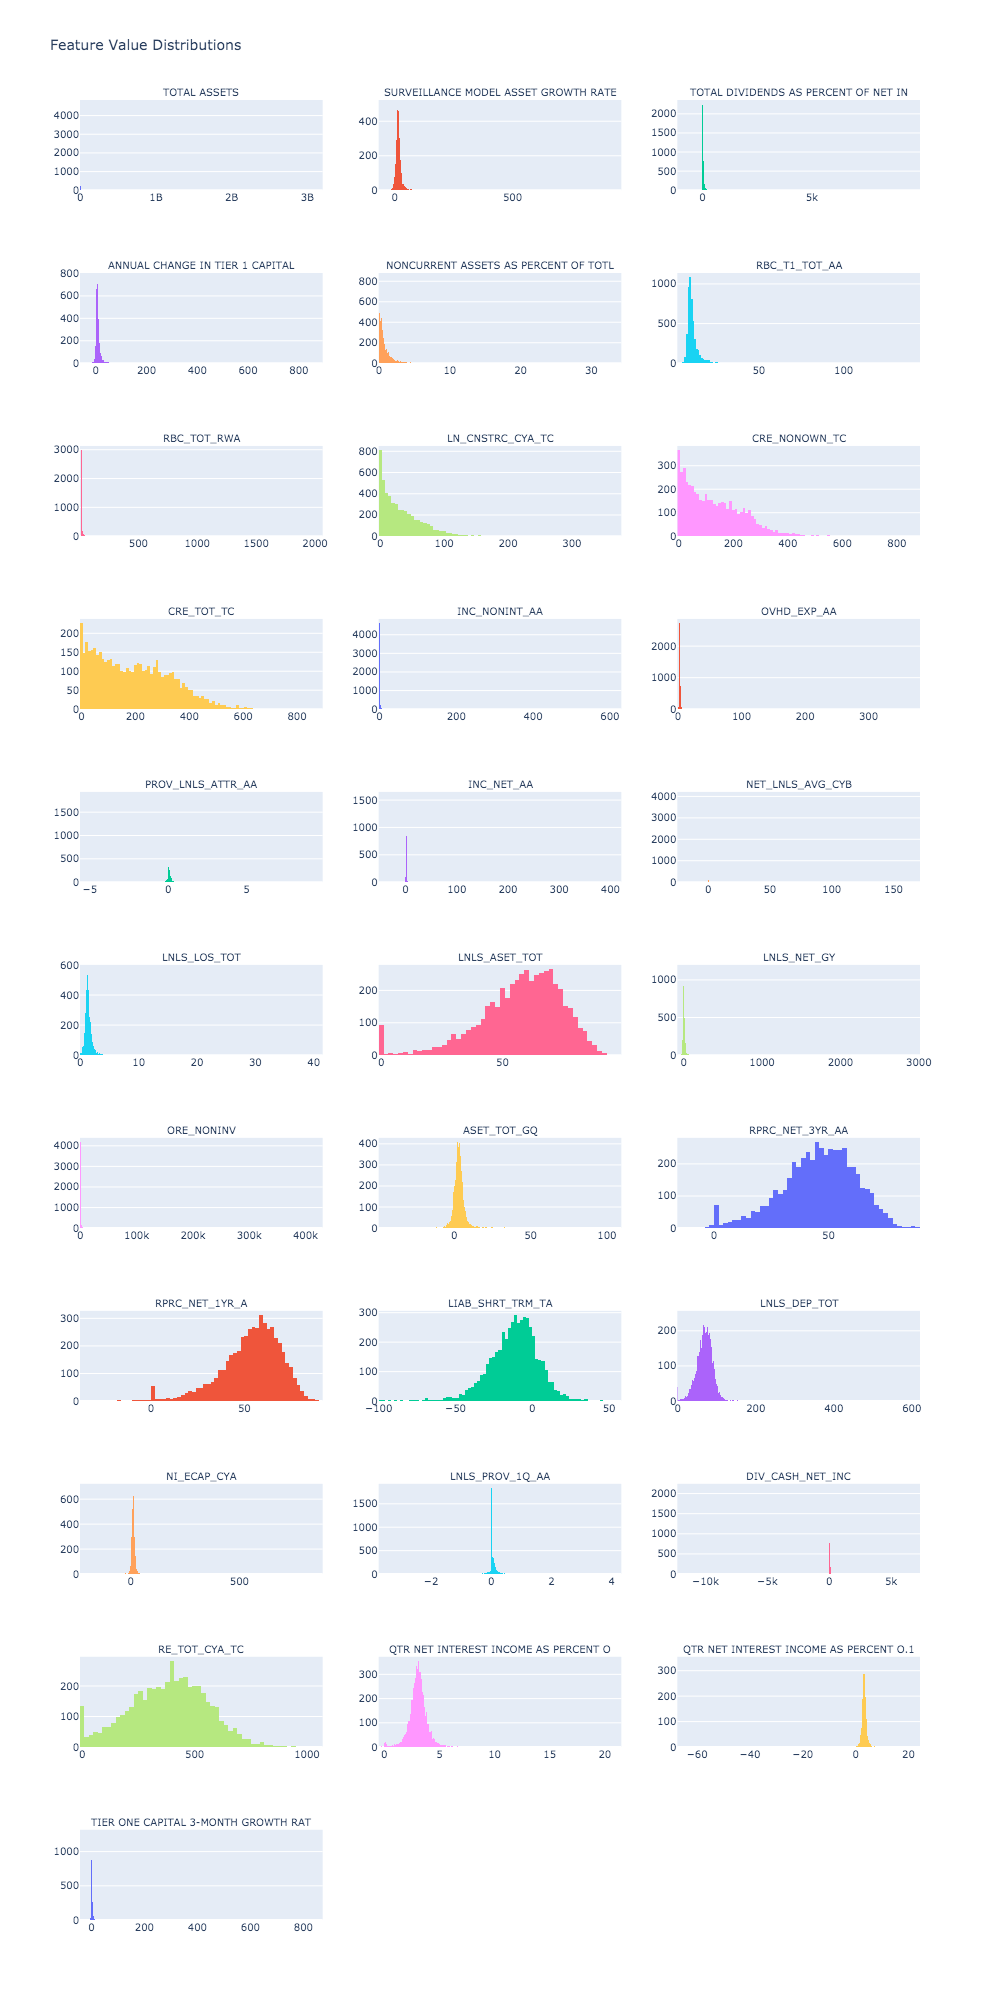

In [6]:
#printing distributions of data:
plot_distributions(data,3,1000,2000,"Feature Value Distributions")

### Note: It looks like most of the features are normally distributed or can be converted into log normal distributions. Lets try that. 

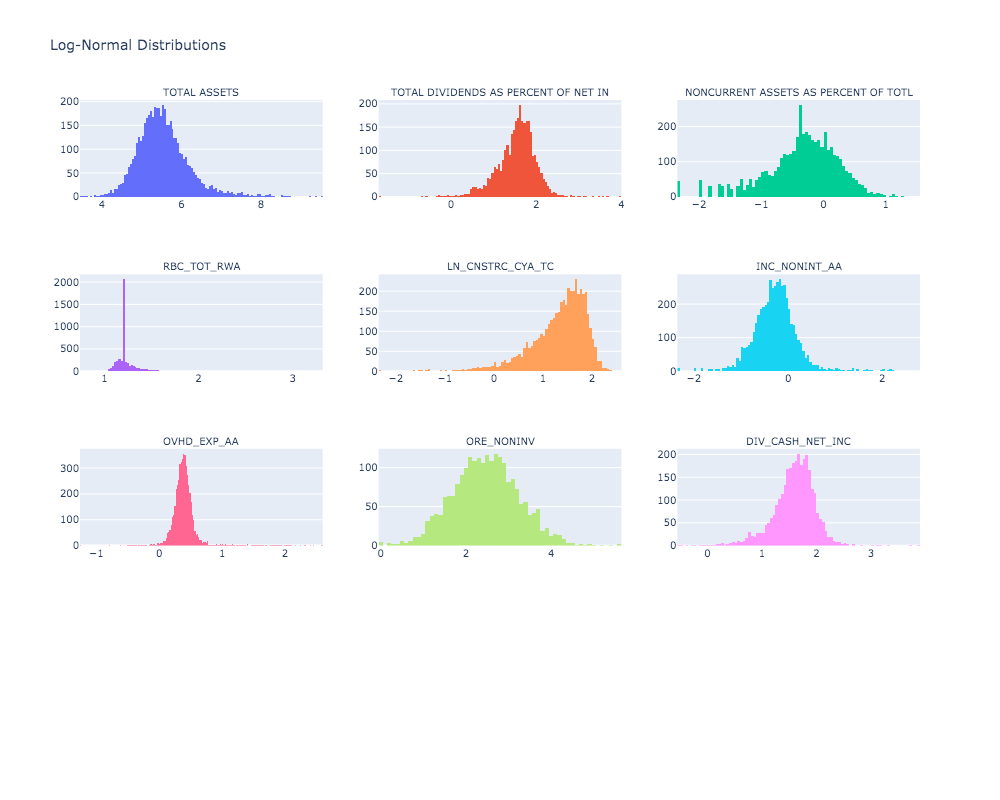

In [7]:
log_normal_features = ["TOTAL ASSETS","TOTAL DIVIDENDS AS PERCENT OF NET IN",
                      "NONCURRENT ASSETS AS PERCENT OF TOTL","RBC_TOT_RWA","LN_CNSTRC_CYA_TC",
                       "INC_NONINT_AA","OVHD_EXP_AA","ORE_NONINV","DIV_CASH_NET_INC"]

#setting divide by zero error off temporarily
np.seterr(divide = 'ignore') 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#plotting the data
plot_distributions(np.log10(data[log_normal_features]),3,1000,800,"Log-Normal Distributions")

### Note: Indeed, we can represent the data through log normal distributions. This means that, if transformed correctly, the data satisfies the basic assumptions for a **Gaussian Mixture Clustering Algorithm.**

## Finishing Up Data Manipulation (Scaling and Logarithmic Transformation) 

The shape of the clean averaged data is: (5030, 31)



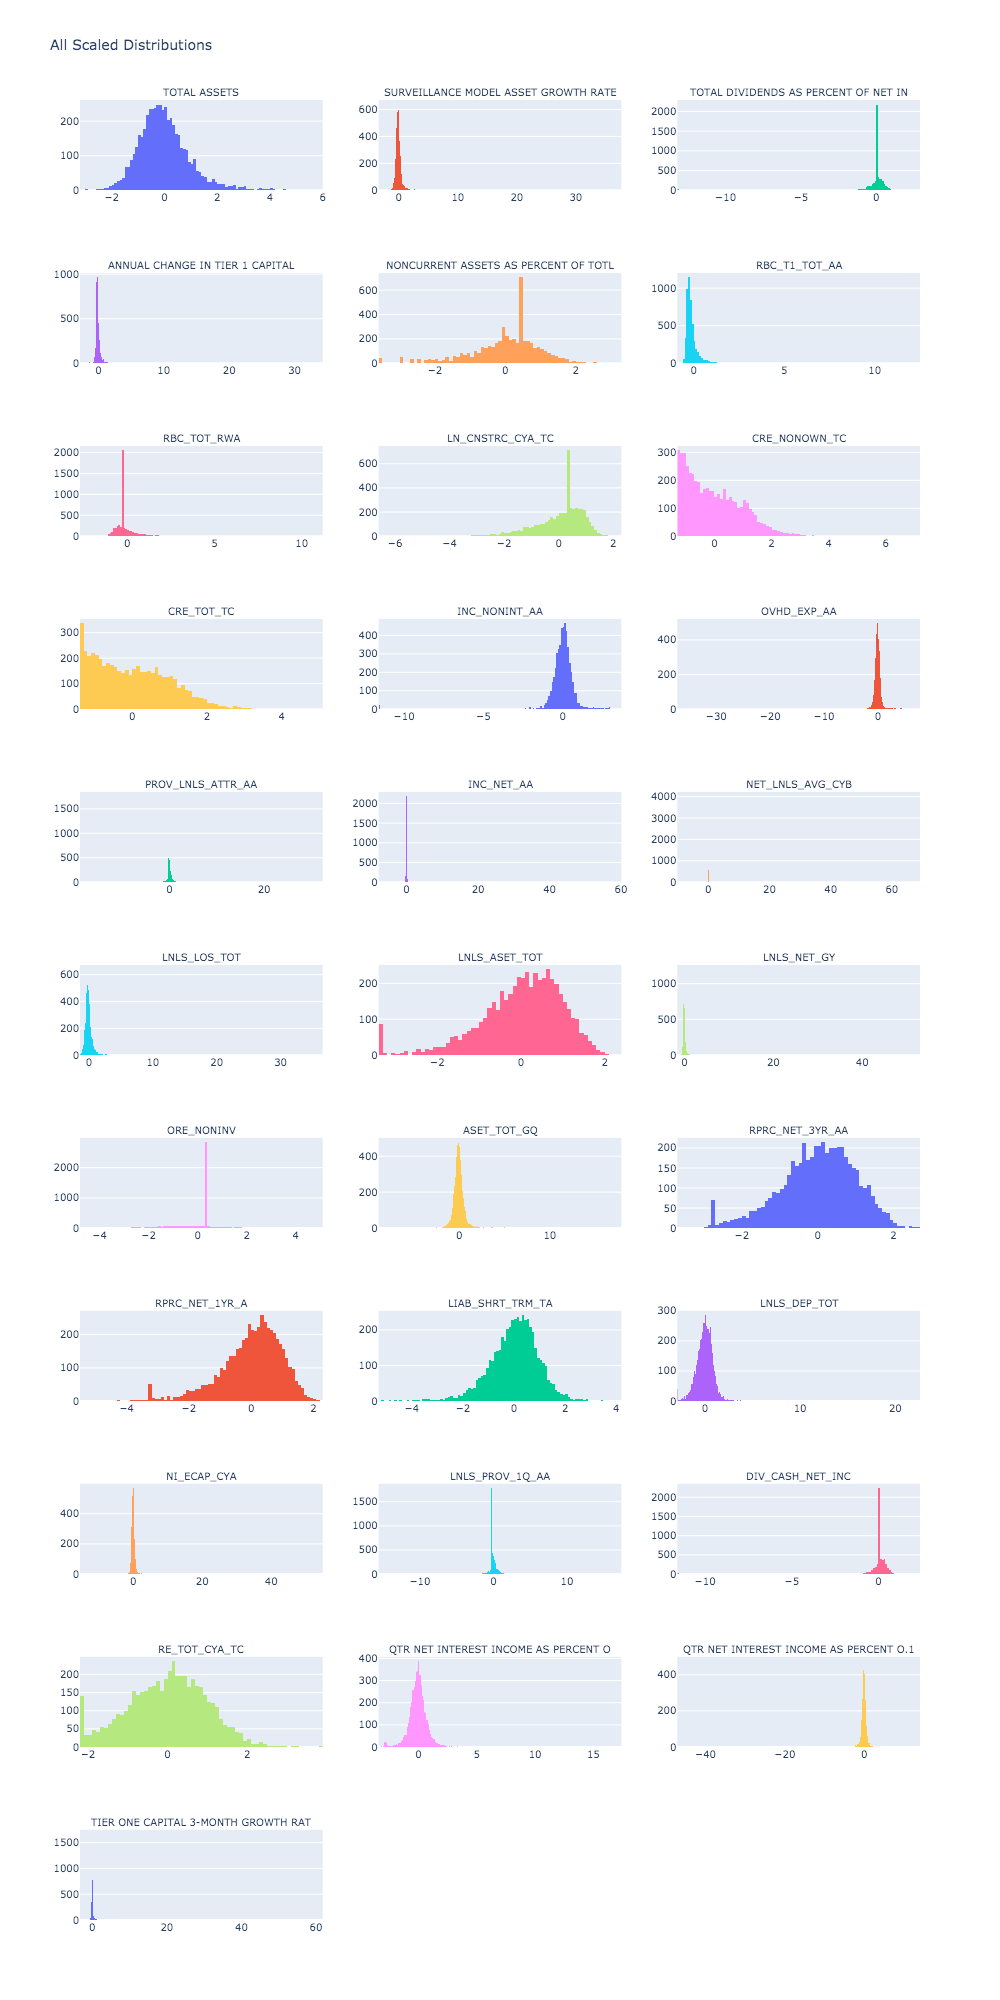

In [8]:
#Transforming data
normal_features = [col for col in data.columns if col not in log_normal_features]
data_temp = data.copy()
data_log10 = data.copy()

#applying log() to data. Grouping negatives into zeros.
data_temp.replace(0,data_temp.mean(axis=0),inplace=True)
data_temp[data_temp <= 0] = 1e-10
data_log10[log_normal_features] = np.log10(data_temp[log_normal_features])

#Scaling data (subtracting the mean and dividing the the standard deviation)
from sklearn.preprocessing import StandardScaler

normal_scaler = StandardScaler()
normal_scaler.fit(data_log10)
scaled_array = normal_scaler.transform(data_log10)
data_scaled = pd.DataFrame(scaled_array, index=data_log10.index, columns=data_log10.columns)

#making the data has been properly scaled 
print("The shape of the clean averaged data is: " + str(data_scaled.shape)+"\n")

#plotting the data
plot_distributions(data_scaled,3,1000,2000,"All Scaled Distributions")

# Question #2:

## Now do it. Build a model that classifies banks. Explain the steps you took and the decisions you made along the way, as if you were leaving notes for the next person who might tackle this problem

# Applying Gaussian Mixture Clustering

We want to be able to find latent groups that might tell us something interesting about "like" banks. This way we can classify new banks/customers into these groups and evaluate them accordingly. 

### Pros:
1. Banks are assigned a probability of belonging to a group (not just a label). This means that we can look at them as belonging to several groups if we want to.
2. The Gaussian Mixture Model allows us to have different covariances in different dimensions. In other words, our clusters can be oval-shaped rather than just circular (as they are in K-means clustering). 
3. It is fairly fast.
4. It should be better than Autoencoder clustering, as it lends itself to interpretation.

### Cons/Assumptions:

1. Assumes that the data can be generated as a mixture of gaussians.
2. It is non deterministic, meaning that different random initializations can give different clustering results.


## Choosing Number of Clusters 

Here we use the silohuette score to choose the number of groups.
Note that we calculate the measure several times with different
random initalizations because GM is not a deterministic algorithm.
We want to get the average measure to get the best results.

In [9]:
#importing the model from sklearn
from sklearn.mixture import GaussianMixture
from sklearn import metrics

#initializing parameters
max_groups = 10
iterations = 5 #could do more but this should do for now
group_range = range(2,max_groups+1)
final_score = []
final_error = []
    
#checking the silohuette score for different number of groups
for n in group_range:
    
    temp_score = []

    for i in range(iterations):
        
        #Initalizing the model
        #Note that we will be using k-means as an initializer
        model = GaussianMixture(n_components=n,covariance_type="full",init_params ="kmeans",random_state=i)
        
        #fitting the model
        model.fit(data_scaled)
        
        #obtaining labels
        prediction = model.predict(data_scaled)
        
        temp_score.append(metrics.silhouette_score(data_scaled, prediction, metric='euclidean'))
        
    #getting average scores
    mean=np.mean(temp_score)
    std = np.std(temp_score)
    final_score.append(mean)
    final_error.append(std)   

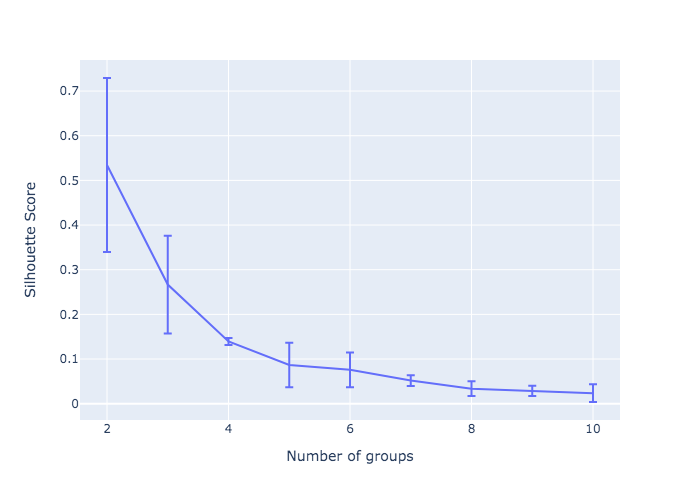

In [26]:
#plotting the silhouette score function
figure = px.line(x=list(group_range), y=final_score, 
                 error_y=final_error)

figure.update_xaxes(title = "Number of groups")
figure.update_yaxes(title = "Silhouette Score")
figure.show(renderer="png")

### Note: There seems to be a diminishing returns at around 5-6 groups. We will choose N = 5 for now to improve visualization and intepretability . We can alway change the number of groups if we want to. 

## Building the Prediction Model with Optimal Number of Groups

In [11]:
#initalizing final predictor. Note the random state is specified in order to ensure reproducibility. 
N=4
final_model = GaussianMixture(n_components=N,covariance_type="full",init_params ="kmeans",random_state=42)

#fitting and predicting
final_model.fit(data_scaled)
labels = final_model.predict(data_scaled)

#adding labels to experimental data
data["Labels"] = labels

#creating 10,000 new data points to represent the fitted gaussian mixture
generated_samples=final_model.sample(n_samples=10000)
samples = pd.DataFrame(generated_samples[0], columns=data_scaled.columns)
samples["Labels"] = generated_samples[1]

#unscaling the generated data samples
unscaled_array = normal_scaler.inverse_transform(samples.drop("Labels",axis=1))
data_unscaled = pd.DataFrame(unscaled_array, columns=data_scaled.columns)
data_unscaled["Labels"] = samples["Labels"]

#rescaling logarithmic data samples back to original magnitudes
data_orig = data_unscaled.copy()
data_orig[log_normal_features] = np.power(10,data_unscaled[log_normal_features])  

In [12]:
samples["Labels"].value_counts()

3    8368
0    1381
1     200
2      51
Name: Labels, dtype: int64

### Note: It looks like Group 3 dominates, followed by Groups 0, 1, and then 2. This leads me to believe that Group 3 may refer to the "average" bank and Group 2 may refer to banks that are outliers. Lets now analyize the groups. 

### Note: We actually used N = 4 instead of N = 5 because the latter created a 5th group that only generated 1/10,000 samples (i.e. it does not really improve clustering performance). 

# **Analyzing/Interpreting the Groups**

## Visualizing the groups in 2-D 


In [13]:
import plotly

def plot_mixtures(input_data,col_num,width,height):
    
    #defining subplot
    plot_features = list(input_data.columns)
    fig = make_subplots(rows=(len(plot_features)//col_num)+1,
                        cols=col_num,
                        subplot_titles=(plot_features[1:]),
                       )
    #getting colors
    colors = plotly.colors.DEFAULT_PLOTLY_COLORS;

    #looping over features
    for row in range(len(plot_features)//col_num+1):
        for col in range(col_num):
            
            #breaking out of code if we plotted everything
            if (row*col_num)+col > len(plot_features)-2:
                break

            #plotting gaussian mixtures
            fig.add_trace(
                    go.Scatter(
                        x= input_data["TOTAL ASSETS"],
                        y= input_data[plot_features[(row*col_num)+col+1]],              
                        mode = 'markers',
                        marker_color = input_data["Labels"],
                        marker=dict(colorscale=['#ae34eb', 'red', 'blue', '#34eb34']),
                        #marker=dict(colorscale=colors),
                        name = plot_features[(row*col_num)+col+1],
                        showlegend=True,
                        opacity=0.75,
                        marker_size=3
                        ),
                    row=row+1, col=col+1
                    )
    
    #printing plots
    fig.update_layout(height=height,
                      width=width,
                      title_text="2D Gaussian Mixtures: Total Assets vs 'Subplot Title'",
                      font=dict(size=10),
                      showlegend=False)
    
    #changing title sizes
    fig.update_annotations(font_size=10)
    
    fig.show(renderer="png")

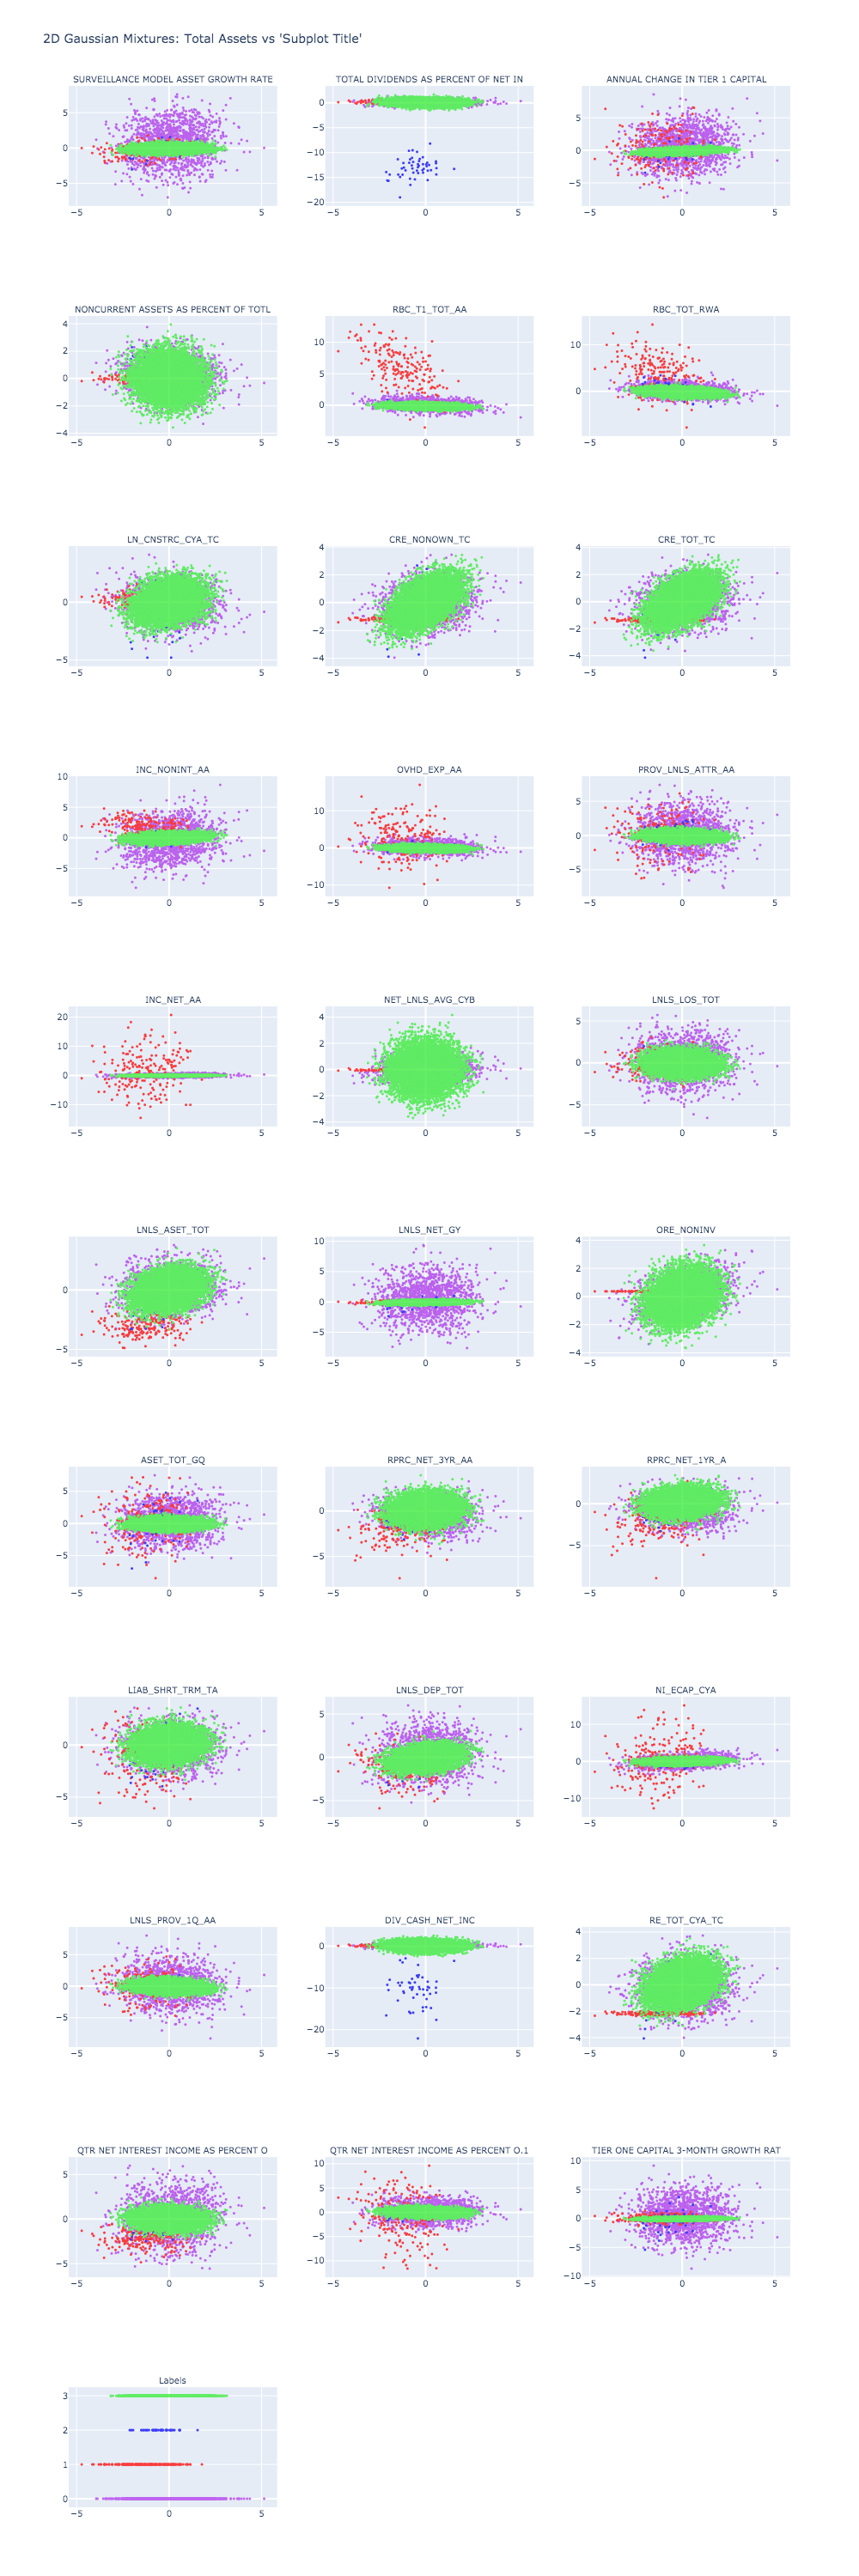

In [14]:
#plotting the data
plot_mixtures(samples,3,1000,3000)

# Conclusions so far:

### This analysis shows that:

### 1. Banks in Group 3 (Green) are essentially the "average bank". 
### 2. Group 2 (Blue) are outliers, particularly in the dividends category. 
### 3. Group 1 (Red) are banks that have relatively high Risk-Based Capital (RBC), low total assets, low net interest incomes, and low RPRCs. 
### 4. Group 0 (Purple) are banks that have relatively high changes in growth rate and in tier 1 capital.

# Building a Usable Tool:

This is just a function that can be used to quickly get the predicted labels using the trained model. 

In [15]:
#building function
def predict_label(sample):
    
    #properly scaling the data (same as before)
    temp = sample.copy()
    new_sample = sample.copy()
    
    temp.replace(0, new_sample.mean(axis=0),inplace=True)
    temp[temp <= 0] = 1e-10
    new_sample[log_normal_features] = np.log10(temp[log_normal_features])

    scaled_arr = normal_scaler.transform(new_sample)
    scaled_sample = pd.DataFrame(scaled_arr, columns=new_sample.columns)
      
    return final_model.predict(scaled_sample), final_model.predict_proba(scaled_sample)

## Predicting Labels for a Given Data Set. 
We will be using a part of the training data set. 
This is not correct but its OK for demonstration purposes.

In [16]:
new_labels, label_probs = predict_label(data.drop("Labels",axis=1))

print("The label for the first bank in the sample is: ",new_labels[0])

The label for the first bank in the sample is:  3


In [17]:
print("The affinity of the first bank to the nth column group is:\n",label_probs[0])

The affinity of the first bank to the nth column group is:
 [0.00544381 0.         0.         0.99455619]


Note that we dont just get a label, but also how probable it is that the sample is in each group. 

# Question #3:

## Now that you’re done, suppose a co-worker is eager to use your results & ideas in our business, starting immediately. What would you advise and why?

We can use these results to solve two different types of problems.

**Problem 1:** Assume that we have limited information for any given bank (say we only have "n" out of the 30 features used here). We can then:
1. Use the trained Gaussian Mixture Model to classify the bank into a given group with only our "n" features.
2. Use the fitted distributions to generate a probabilistic value set for the "30-n" remaining features. 

For example, we could check the probability that a bank has large growth rates (Group 0) or a high amount of Risk-Based Capital (Group 3) using seemingly independent features.

**Problem 2:** Assume that we have a new bank and all the relevant feature values: We can then:
1. Categorize the new bank into the given group or set of groups. We can do the latter because the Gaussian Mixture Model allows us to see calculate how much "affinity" each bank has to a given group. We can choose the top "N" groups if necessary. 
2. We can then use the group affiliation(s) to evaluate if we should give it the same type of services/rates/treatment that we would give "like" banks in the same group.


# Question #4:

## When should your solution NOT be used?

This solution should only be used as a **preliminary** screen to speed up the bank evaluation process. It should be used to look up the most likely services that we should give a new customer, or to do a quick estimation of missing features. It is an exploratory tool and should NOT be used to make final financial or service decisions, at least not in its current state. 

# Question #5:

## If you had more time and resources, what would you do next, to improve or refine your work?

The most important thing that is missing from this analysis is accurately labeling and interpreting the bank groups. Sometimes it is better to have an interpretable but worse-performing algorithm (i.e. a higher Silhouette score) than a great clustering algorithm that does not let you interpret the data. If I had more time I would vary the number of groups and analyze the resulting distributions against additional data in order to try and find the underlying reasons why this algorithm decided to separate the samples into these groups. 

Other possibilities include:
1) I would try and tailor the algorithm to answer a more precise question/application. For example: "Could we use group membership to try and predict a particular metric?" This would involve the addition of a supervised model on top of the current project.  


2) Looking at the data from previous (and future) years. It would be interesting if these groups perform (or have performed differently) than their counterparts. 


3) Cleaning up the analysis. For example:

    1. Should we use the mean instead of the median to input missing values (if at all)?
    
    2. What happens if we include some correlated features? 
    
    3. Can we add additional weights to certain features to get better group classification? 
    
    4. Should we use the Bayesian Information Criterion and/or the JS metric to better evaluate clustering?


# Question #6:

## Tell us what you think of this homework assignment. What would you do differently, if you were designing it?

I really enjoyed this assignment and will certainly continue to expand this mini-project in the future. If I were designing it I would change the following:

1. I would link to this [document](https://cdr.ffiec.gov/CDRDownload/CDR/UserGuide/v104/Technical%20Information.pdf) explaining the data within the assignment prompt. This would streamline the project initiation phase. 

The things that I liked about it:

1. It is open-ended.
2. The questions guided the project, but did not hint towards a particular path. 
3. I liked how we had to identify both the potential applications and the limits of our own work. 

# Extra Stuff That I Used:

## Looking at Box Plots of the Group Data

In [23]:
#defining plotting function
def plotBoxPlots(input_data,parameters,is_log):
    
    fig = go.Figure()

    for par in parameters:
    
        fig = fig.add_trace(go.Box(x=input_data["Labels"],
                               y=input_data[par],
                               name = par))

    fig.update_xaxes(type='category')
    
    if is_log == True:
        fig.update_yaxes(type='log')
        
    fig.update_layout(boxmode='group')
    fig.show(renderer="png")

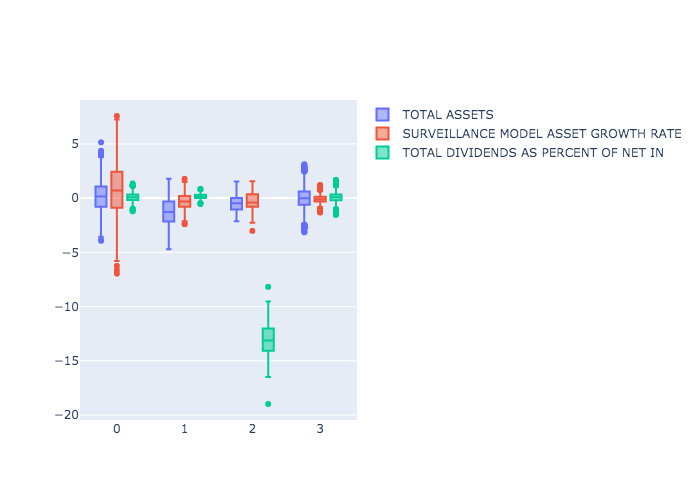

In [24]:
#plotting
test_features = list(samples.columns[:3])
plotBoxPlots(samples,test_features,False)

## Visualazing data in 3D

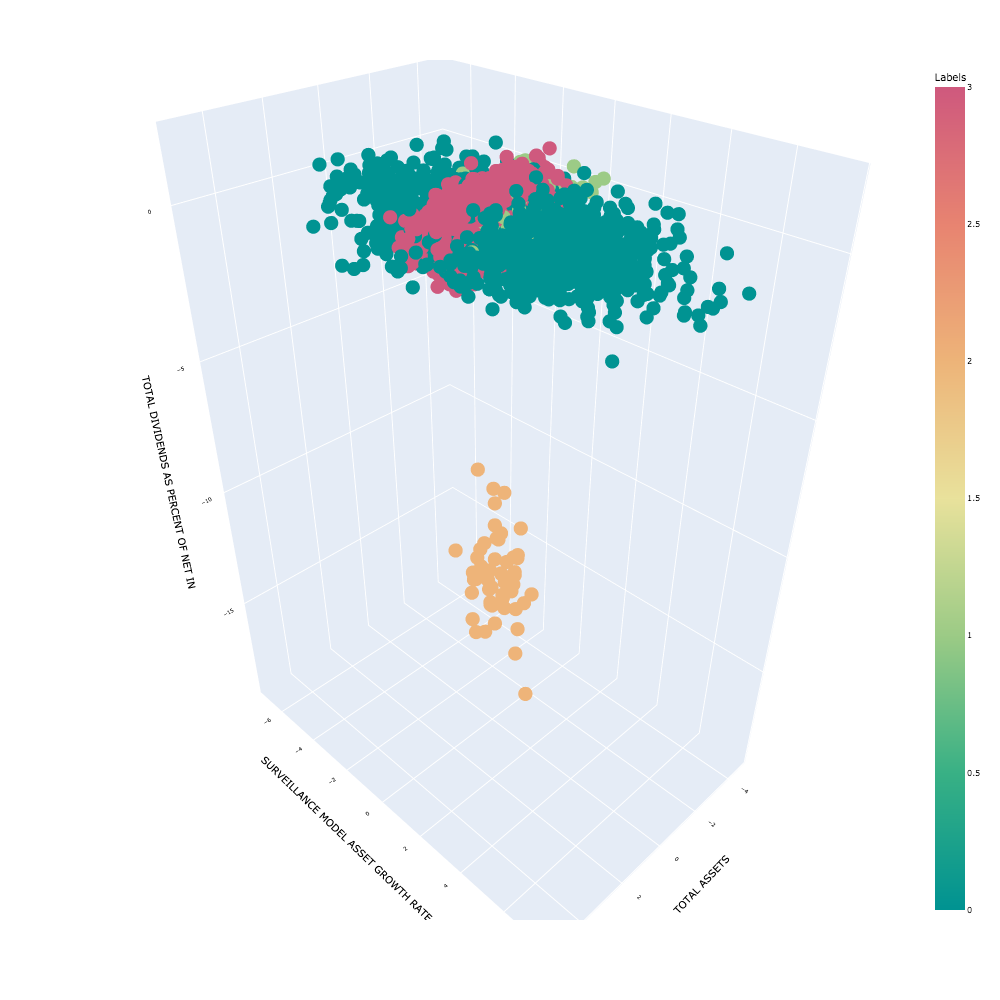

In [25]:
#choose the three features you want to visualize
features = list(samples.columns[:3])

#plotting 3D scatter plot
scatter3D = px.scatter_3d(samples,
                          x=features[0],
                          y=features[1],
                          z=features[2], 
                          color='Labels',
                          color_continuous_scale='temps')


scatter3D.update_layout(height=1000, width=1000 ,font = dict(color= "black",size=8),legend=dict(x=0.8, y=0.5))
scatter3D.show(renderer="png")